In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

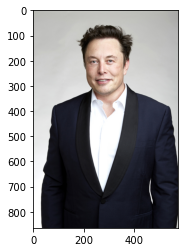

In [23]:
img = cv2.imread("musk_lad.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [24]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface.xml')

In [25]:
def detect_face(img):
    
    img_copy = img.copy()
    
    rects = face_cascade.detectMultiScale(img_copy)
    
    return rects

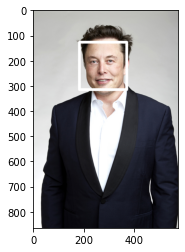

In [26]:
img_copy = img.copy()
rects = detect_face(img_copy)
for (x, y, w, h) in rects:
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 255, 255), 10)
plt.imshow(img_copy)

In [27]:
def blur_img(rects, img):
    
    img_copy = img.copy()
   
    for rect in rects:
        face = img_copy[rect[1]:(rect[1] + rect[3]), rect[0]:(rect[0] + rect[2])]
        blur_face = cv2.medianBlur(face, 31)
        img_copy[rect[1]:(rect[1] + rect[3]), rect[0]:(rect[0] + rect[2])] = blur_face
    
    return img_copy

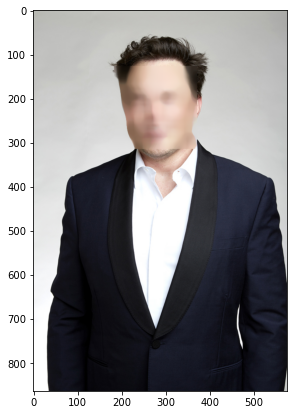

In [28]:
plt.figure(figsize=(11, 7))

blurred = blur_img(rects, img)

plt.imshow(blurred)

In [29]:
video_source = 0 # 0 IF VIDEO CAMERA, FILE NAME OTHERWISE

capture = cv2.VideoCapture(video_source)

while True:
    ret, frame = capture.read()
    
    rects = detect_face(frame)
    
    blurred = blur_img(rects, frame)
    
    cv2.imshow("Blurred Face", blurred)
    
    key = cv2.waitKey(1) # Maybe 25 if using a file source
    
    if key == 27: #Esc key
        break
        
capture.release()
cv2.destroyAllWindows()